In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets,layers,models

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
X_train[0].shape

(28, 28)

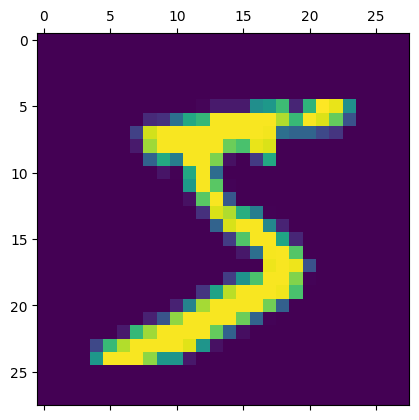

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

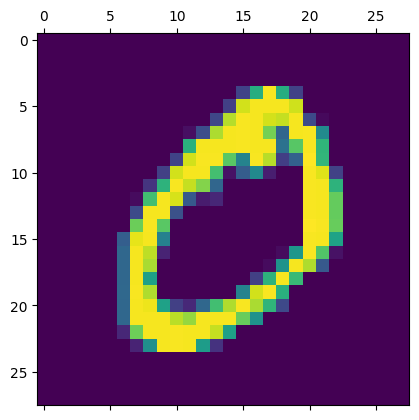

In [9]:
plt.matshow(X_train[1])

In [10]:
X_train=X_train/255
X_test=X_test/255


In [11]:
X_train_flat=X_train.reshape(len(X_train),(28*28))
X_test_flat=X_test.reshape(len(X_test),(28*28))

In [12]:
X_train_flat.shape

(60000, 784)

In [16]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),  
    keras.layers.Dense(10, activation='softmax')  
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flat,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7975 - loss: 0.6670
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9247 - loss: 0.2649
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9349 - loss: 0.2172
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9411 - loss: 0.1943
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9450 - loss: 0.1784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9484 - loss: 0.1677
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9513 - loss: 0.1578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9534 - loss: 0.1482
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9558 - loss: 0.1413
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9550 - loss: 0.1442


In [17]:
model.evaluate(X_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.9678 - loss: 0.1102


[0.0941363126039505, 0.972599983215332]

In [18]:
y_pred=model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


In [19]:
y_test[874]

9

In [20]:
np.argmax(y_pred[874])

9

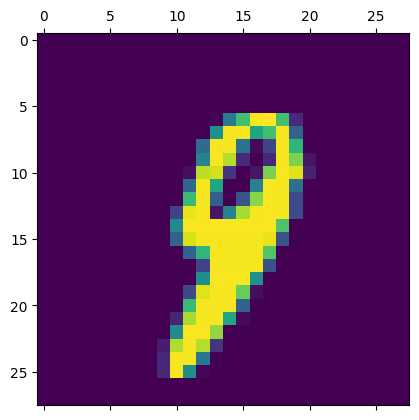

In [21]:
plt.matshow(X_test[874])

In [22]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [23]:
y_pred_labels[:7]

[7, 2, 1, 0, 4, 1, 4]

In [24]:
y_test[:7]

array([7, 2, 1, 0, 4, 1, 4], dtype=uint8)

In [25]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    2,    1,    0,    0,    3,    1,    2,    0],
       [   0, 1120,    3,    2,    0,    0,    3,    1,    6,    0],
       [   6,    0,  997,    6,    4,    0,    5,   10,    4,    0],
       [   1,    0,    2,  989,    0,    4,    0,    7,    5,    2],
       [   1,    0,    5,    0,  956,    0,    7,    3,    2,    8],
       [   2,    0,    0,   12,    2,  864,    6,    0,    4,    2],
       [   5,    3,    0,    1,    3,    5,  938,    0,    3,    0],
       [   3,    5,   12,    6,    3,    0,    0,  989,    1,    9],
       [   5,    1,    1,    8,    4,    5,    4,    6,  937,    3],
       [   4,    5,    1,    8,   14,    5,    1,    4,    2,  965]])>

Text(50.722222222222214, 0.5, 'Actual')

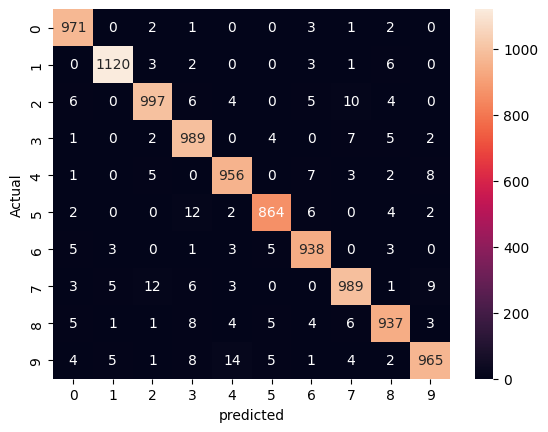

In [27]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Actual')